### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
data = pd.read_csv("global air pollution dataset.csv")

data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
data.shape

(23463, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


## Cleaning the DataSet

In [5]:
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [9]:
data.shape

(23035, 12)

In [10]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000
mean,72.344693,1.376254,35.233905,3.084741,68.883482
std,56.360992,1.844926,28.236613,5.281708,55.057396
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


### AQI Value Distribution Plot

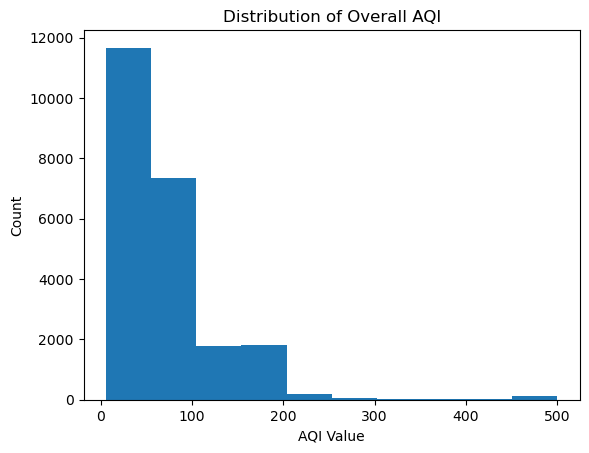

In [11]:
plt.figure()
plt.hist(data["AQI Value"], bins=10)
plt.xlabel("AQI Value")
plt.ylabel("Count")
plt.title("Distribution of Overall AQI")
plt.show()


### AQI Category Count Plot

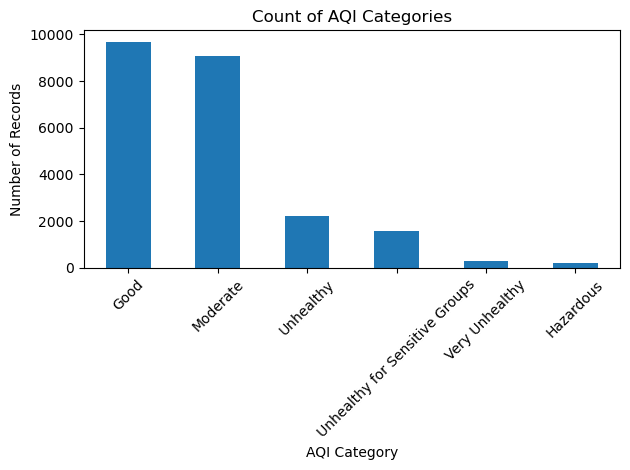

In [12]:
plt.figure()
data["AQI Category"].value_counts().plot(kind="bar")
plt.xlabel("AQI Category")
plt.ylabel("Number of Records")
plt.title("Count of AQI Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
numeric_cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value",
                "NO2 AQI Value", "PM2.5 AQI Value"]

data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

### Pollutants Comparision

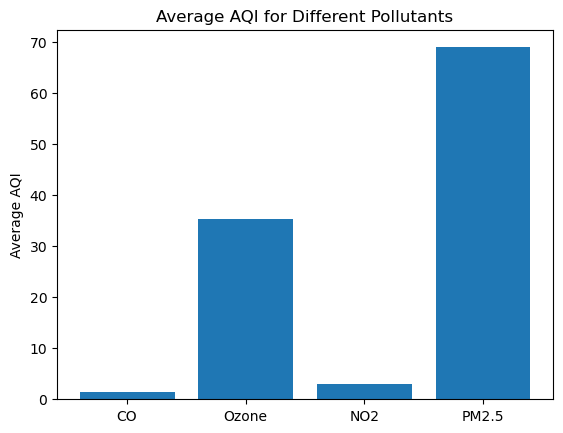

In [14]:
pollutant_means = {
    "CO": data["CO AQI Value"].mean(),
    "Ozone": data["Ozone AQI Value"].mean(),
    "NO2": data["NO2 AQI Value"].mean(),
    "PM2.5": data["PM2.5 AQI Value"].mean()
}

plt.figure()
plt.bar(pollutant_means.keys(), pollutant_means.values())
plt.ylabel("Average AQI")
plt.title("Average AQI for Different Pollutants")
plt.show()


### Top 15 Most Polluted Cities

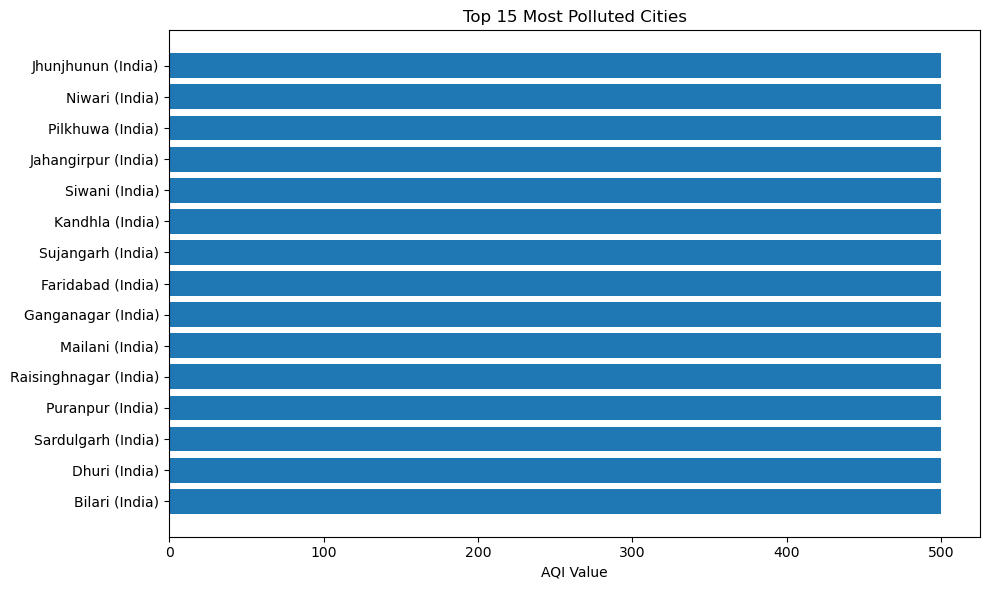

In [15]:
top_cities = data.sort_values("AQI Value", ascending=False).head(15)

plt.figure(figsize=(10, 6))
labels = top_cities["City"] + " (" + top_cities["Country"] + ")"
plt.barh(labels, top_cities["AQI Value"])
plt.xlabel("AQI Value")
plt.title("Top 15 Most Polluted Cities")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 15 Most Polluted Countries

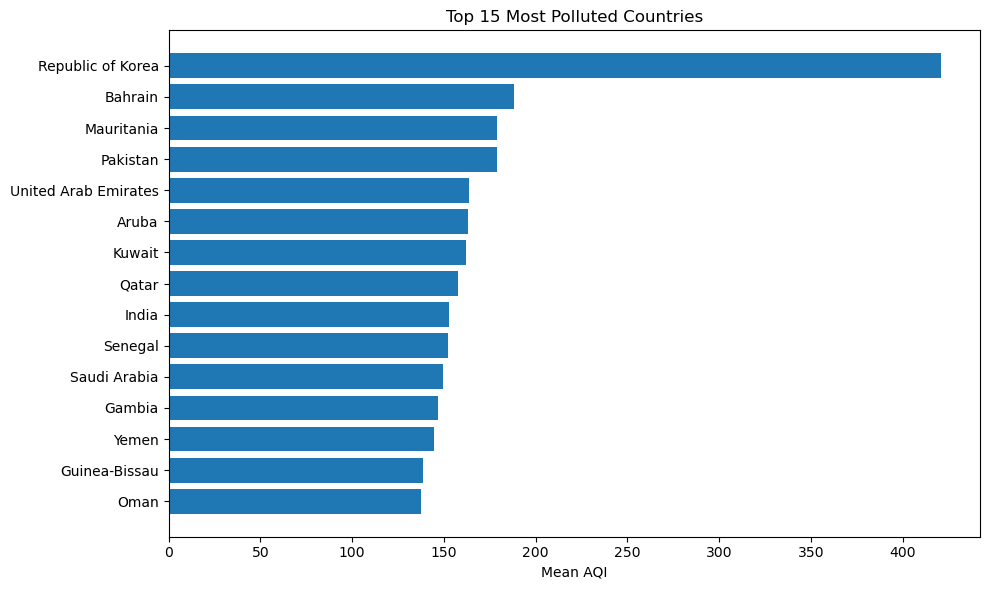

In [16]:
country_agg = data.groupby("Country", as_index=False)["AQI Value"].mean()
top_countries = country_agg.sort_values("AQI Value", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_countries["Country"], top_countries["AQI Value"])
plt.xlabel("Mean AQI")
plt.title("Top 15 Most Polluted Countries")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Correlation Between Pollutants

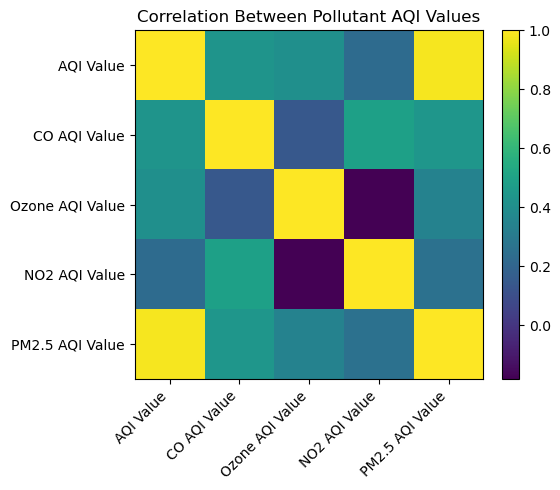

In [17]:
corr = data[numeric_cols].corr()

plt.figure(figsize=(6, 5))
im = plt.imshow(corr, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Between Pollutant AQI Values")
plt.tight_layout()
plt.show()


In [19]:
data.to_csv("./global_air_pollution_cleaned_dropna.csv", index=False)
print("Saved cleaned dataset")


Saved cleaned dataset
